<KeysViewHDF5 ['coords', 'network', 'pres', 'station', 'time']>


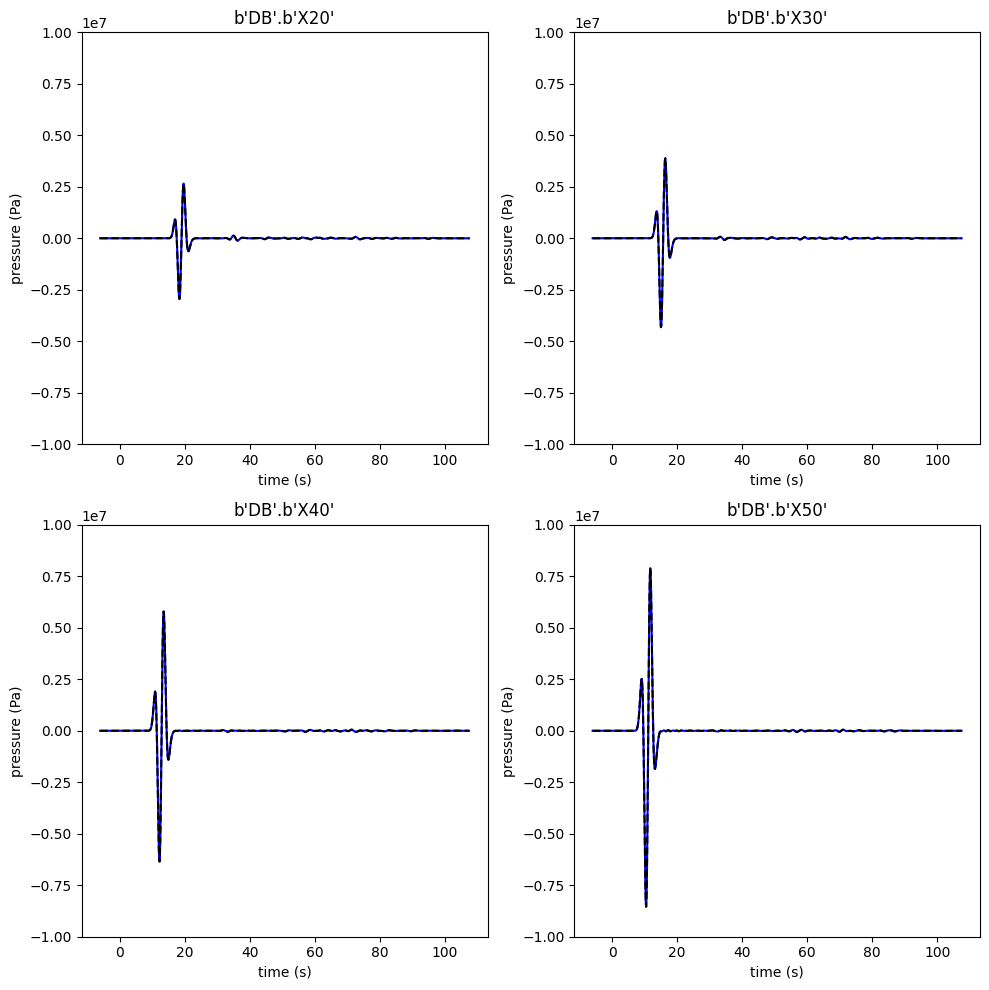

In [3]:
# read and plot the seismograms in hdf5 format

import h5py

fseis = "OUTPUT_FILES/seismograms.h5"


# open 
with h5py.File(fseis, "r") as f:

    # contents
    # coords                   Dataset {3, 4}
    # network                  Dataset {4}
    # pres                     Dataset {4, 1000}
    # station                  Dataset {4}
    # time                     Dataset {1000}

    print(f.keys())

    # load data
    network = f["network"][:]
    station = f["station"][:]
    coords = f["coords"][:]
    time = f["time"][:]
    pres = f["pres"][:]

# read reference seismograms
import numpy as np
fx20 = np.loadtxt("REF_SEIS/DB.X20.MXP.semp")
fx30 = np.loadtxt("REF_SEIS/DB.X30.MXP.semp")
fx40 = np.loadtxt("REF_SEIS/DB.X40.MXP.semp")
fx50 = np.loadtxt("REF_SEIS/DB.X50.MXP.semp")

fx = np.array([fx20, fx30, fx40, fx50])


# plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i in range(4):
    ax[i // 2, i % 2].plot(time, pres[i, :], "b")
    ax[i // 2, i % 2].plot(fx[i][:, 0], fx[i][:, 1], "k--")
    ax[i // 2, i % 2].set_title("{}.{}".format(network[i], station[i]))
    ax[i // 2, i % 2].set_xlabel("time (s)")
    ax[i // 2, i % 2].set_ylabel("pressure (Pa)")
    # y limit 
    ax[i // 2, i % 2].set_ylim([-1e7, 1e7])
    # x limit
    #ax[i // 2, i % 2].set_xlim([10, 30])

plt.tight_layout()
plt.show()